## Problem statement

 We have a data that describes the number of daily female births in California in 2021. The dataset is attached as a csv file containing 365 records based on daily basis of birth in 2021. You have to perform a time series analysis on that data:
 
a. Find the daily basis birth rate on 5 days periods. 

b. Find the moving averages on 1 month period

c. Prepare a visualization charts for both 5 days and 1 month period of Moving averages.

d. Find the maximum birth rate of females in particular month of 2021 and minimum birth rate. e.g. In May 500 females have born and in Feb 200 Females have born.

e. Use this analyzed data to forecast next 5 days moving averages of female births. e.g. You have data from 1 jan 2021 to 31 dec 2021. You have to forecast the moving average of next starting 5 days in 2022.


## Approach to solve the problem

step 1- first i have loaded the data and find the rolling mean and standard deviation to check the trend present in the data.

step 2- secondly i have prepared the data for rolling mean for five days and one month period and plotted to better visualisation of data

step 3- Then, i have transformed the data into series to get maximum and minimum value into the data and applied some series operator

step 4- After that i have implemented two type of model i.e. base line model implementation and ARIMA model to forecast the next 5 days in year 2022

step 5- Accuracy of model was satisfactory with ARIMA model so i have forcasted the data with the help of arima model

### imported some libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
from sklearn.metrics import mean_squared_error

### Loaded the data

In [2]:
df=pd.read_csv('Problem_statement3.csv (1).xls',parse_dates=['Date'],index_col='Date')
df.head()

,Births
Date,
2021-01-01,35
2021-01-02,32
2021-01-03,30
2021-01-04,31
2021-01-05,44


In [3]:
df.tail()

,Births
Date,
2021-12-27,37
2021-12-28,52
2021-12-29,48
2021-12-30,55
2021-12-31,50


### Visualised the original data

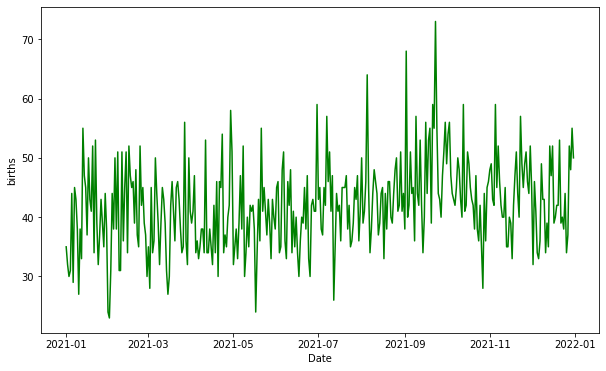

In [4]:
plt.xlabel('Date')
plt.ylabel('births')
plt.plot(df,color='green')

In [5]:
# determining rolling stastics to check stationarity 
rol_mean=df.rolling(window=30).mean()
rol_std=df.rolling(window=30).std()

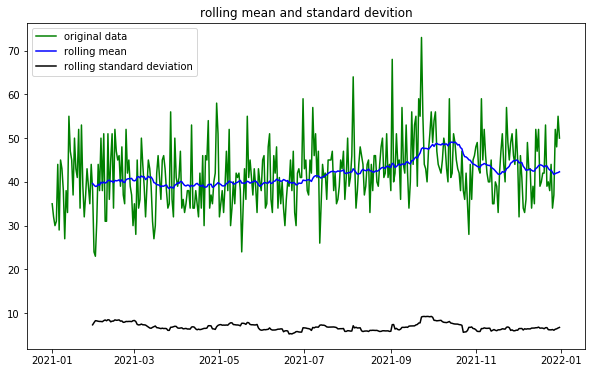

In [6]:
#plotting rolling stastics
original=plt.plot(df,color='green',label='original data')
mean=plt.plot(rol_mean,color='blue',label='rolling mean')
std=plt.plot(rol_std,color='black',label='rolling standard deviation')
plt.legend(loc='best')
plt.title('rolling mean and standard devition')
plt.show(block=False)

hence we can conclude the data is not stationary there is some sort of trend

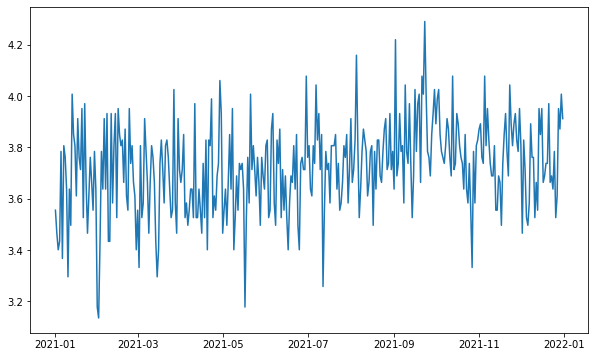

In [7]:
#Estimating the trend
log_dataset=np.log(df)
plt.plot(log_dataset)

### Visualise the data with different rolling statistics

### Rolling statistics for 5 days period

In [8]:
df_mean_5D=df.rolling(window=5).mean()

In [9]:
df_mean_5D.describe()

,Births
count,361.000000
mean,41.980609
std,4.178671
min,32.000000
25%,39.000000
50%,41.800000
75%,44.600000
max,57.200000


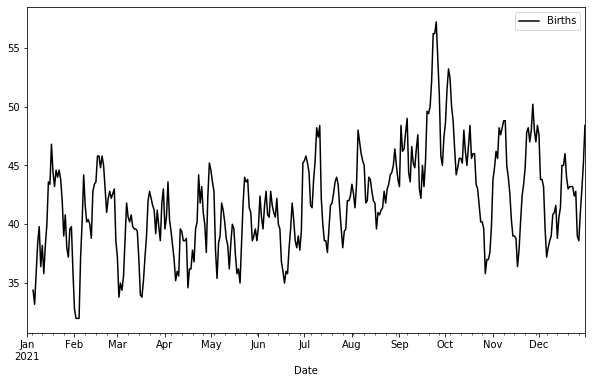

In [10]:
df_mean_5D.plot(color='black')

### Rolling statistics for 1 month period

In [11]:
df_mean_1M=df.rolling(window=30).mean()

In [12]:
df_mean_1M.describe()

,Births
count,336.000000
mean,42.049405
std,2.699298
min,38.466667
25%,39.833333
50%,41.566667
75%,43.566667
max,49.100000


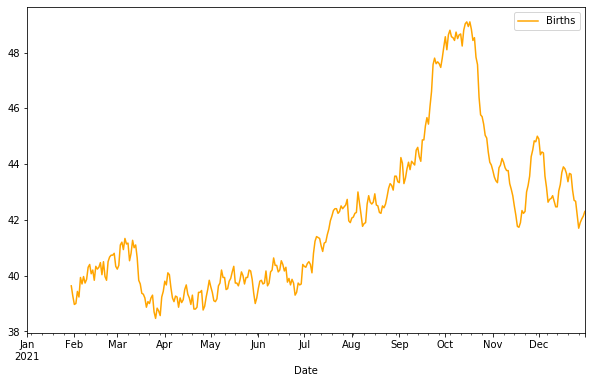

In [13]:
df_mean_1M.plot(color='orange')

### Plotting the combine graph for better visualisation 

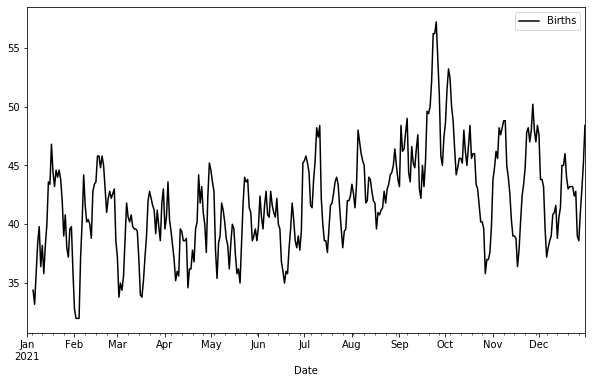

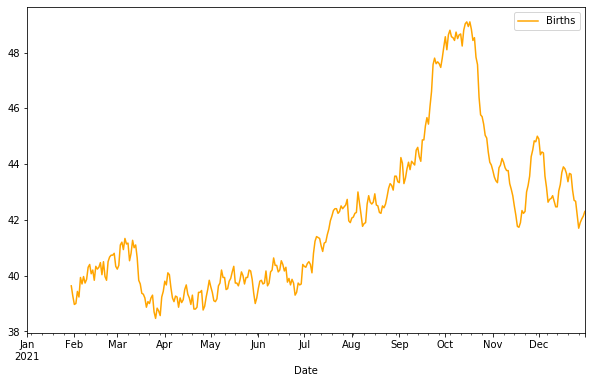

In [14]:

df_mean_5D.plot(label='for 5 days analysis',color='black')
df_mean_1M.plot(label='for monthly analysis',color='orange')

### Conveting the data into series and extracted the maximum and minimum data with their respective indexes

In [15]:
series=pd.read_csv('Problem_statement3.csv (1).xls',squeeze=True,index_col='Date')
series.head()

Date
1/1/2021    35
1/2/2021    32
1/3/2021    30
1/4/2021    31
1/5/2021    44
Name: Births, dtype: int64

### For maximum

In [16]:
series.idxmax()

'9/23/2021'

In [17]:
series.max()

73

### For minimum

In [18]:
series.idxmin()

'2/1/2021'

In [19]:
series.min()

23

### base line model implementation with the shift method

In [20]:
birth_df=pd.concat([df['Births'],df['Births'].shift(1)],axis=1)

In [21]:
birth_df.columns=['Actual_birth','Forecast_birth']

In [22]:
birth_df

,Actual_birth,Forecast_birth
Date,,
2021-01-01,35,NaN
2021-01-02,32,35.0
2021-01-03,30,32.0
2021-01-04,31,30.0
2021-01-05,44,31.0
...,...,...
2021-12-27,37,34.0
2021-12-28,52,37.0
2021-12-29,48,52.0


In [23]:
birth_df=birth_df[1:]

In [24]:
birth_error =mean_squared_error(birth_df.Actual_birth,birth_df.Forecast_birth) 

In [25]:
birth_error  # mean square error

84.22252747252747

In [26]:
np.sqrt(birth_error)  #error

9.177283229394606

### implementaion of ARIMA model


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

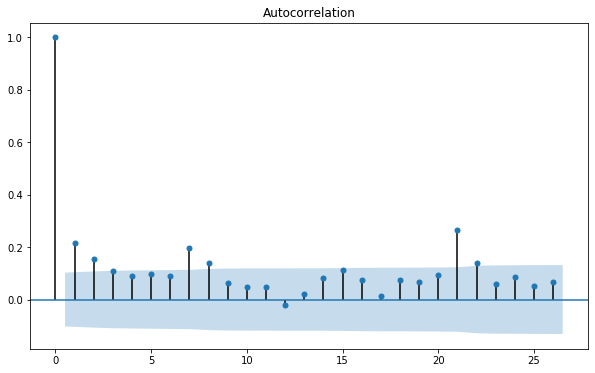

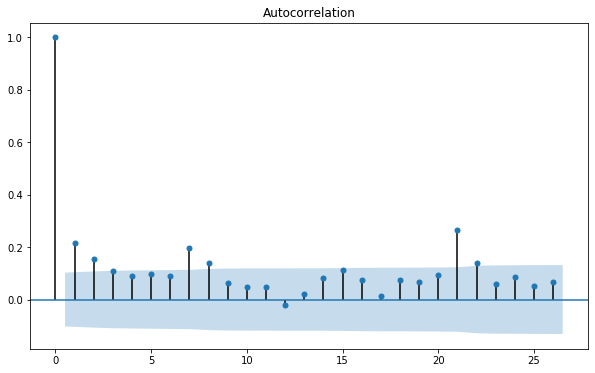

In [28]:
plot_acf(df) # to identify the value Q

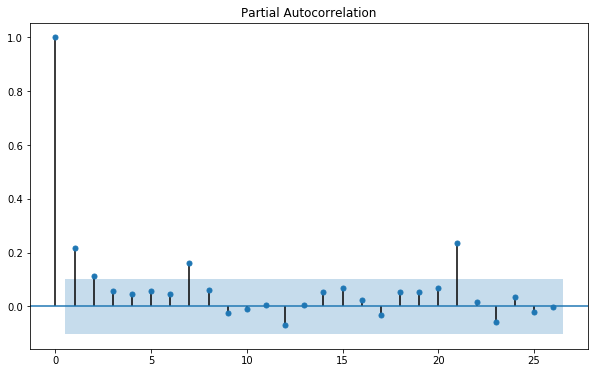

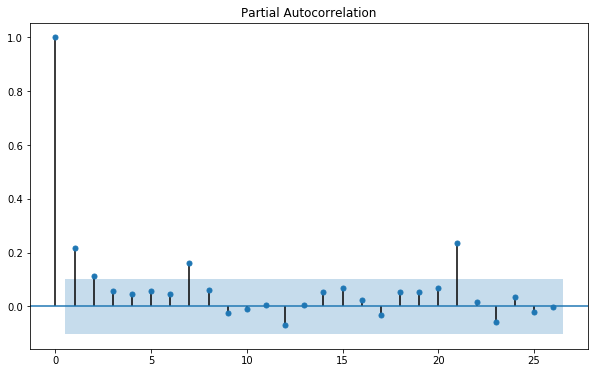

In [29]:
plot_pacf(df)   #to identify the value of p

In [30]:
# size of data
df.size

365

In [31]:
birth_train =df[0:330]   # train test split
birth_test=df[330:365]

In [32]:
birth_train.size

330

In [33]:
model=ARIMA(birth_train,order=(2,1,3))

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
model_fit=model.fit(disp=-1)

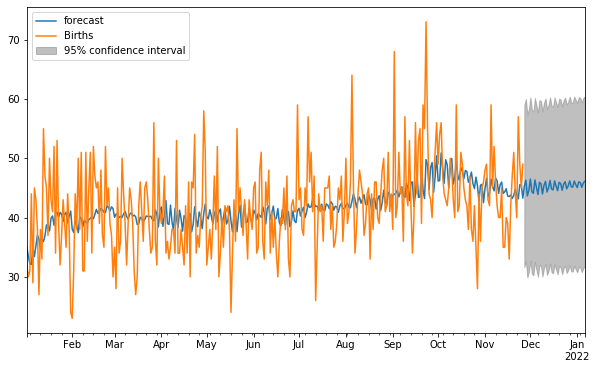

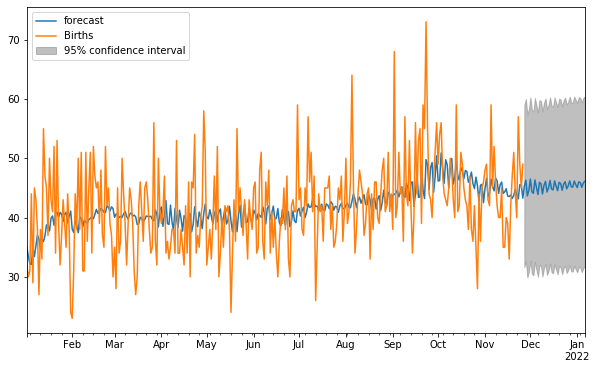

In [35]:
# forcasted with the help of graph
model_fit.plot_predict(1,370)

In [36]:
birth_forecast = model_fit.forecast(steps=5)[0]

In [37]:
birth_forecast  # Next 5 predicted value

array([45.3037047 , 46.31063925, 43.64946318, 44.59220318, 46.49706451])

Conclusion: Better visualised the trend with help of rolling mean for different interval and Model worked well with arima model and sucessfully forecasted the value